In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.7f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [18]:
obesity_rate = pd.read_csv('D:/CASA0007-qm/assignment/single_gdptwo.csv',low_memory=False)
obesity_rate.head()

,local_authority_area,tenyear_ratio_change,DGP_perhead,region
0,Derby,0.0003321,31322,East Midlands
1,Derbyshire,0.0001772,25425,East Midlands
2,Leicester,0.0002738,26815,East Midlands
3,Leicestershire,0.0002563,28046,East Midlands
4,Lincolnshire,0.0001028,23313,East Midlands


In [21]:
df = obesity_rate
df_rank=df.groupby("region")
df_rank["tenyear_ratio_change"].agg(["mean","median","std","min","max"]).reset_index()
# The mean, median of 'East Midlands','North East','East of London' are similar, so replaceand combine these three lines.
# Define 'East Around London'='East Midlands'='North East'='East of London'.

,region,mean,median,std,min,max
0,East Midlands,0.0001373,0.0001772,0.0001821,-0.0002916,0.0003321
1,East of England,0.0001463,0.0001517,0.0000694,0.0000057,0.0002396
2,London,0.0006298,0.0006701,0.0001816,0.0000740,0.0010145
3,North East,0.0003421,0.0003429,0.0001452,0.0000902,0.0006891
4,North West,0.0004613,0.0004742,0.0001816,0.0001044,0.0008439
5,South East,0.0001914,0.0001582,0.0001701,-0.0001374,0.0005462
6,South West,0.0000981,0.0001715,0.0002317,-0.0006334,0.0003154
7,West Midlands,0.0002838,0.0002369,0.0001710,0.0000264,0.0005458
8,Yorkshire and the Humber,0.0003731,0.0003785,0.0001363,0.0001579,0.0007053


In [23]:
obesity_rate = pd.read_csv('D:/CASA0007-qm/assignment/single_gdpfour.csv',low_memory=False)
obesity_rate.info()
obesity_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tenyear_ratio_change  152 non-null    float64
 1   DGP_perhead           152 non-null    int64  
 2   region                152 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


,tenyear_ratio_change,DGP_perhead,region
0,0.0003321,31322,East_Around_London
1,0.0001772,25425,East_Around_London
2,0.0002738,26815,East_Around_London
3,0.0002563,28046,East_Around_London
4,0.0001028,23313,East_Around_London


In [24]:
obesity_rate_numeric = pd.get_dummies(obesity_rate)
obesity_rate_numeric.info()
# explained in In[21]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tenyear_ratio_change             152 non-null    float64
 1   DGP_perhead                      152 non-null    int64  
 2   region_East_Around_London        152 non-null    uint8  
 3   region_London                    152 non-null    uint8  
 4   region_North_East                152 non-null    uint8  
 5   region_North_West                152 non-null    uint8  
 6   region_South_West                152 non-null    uint8  
 7   region_West_Midlands             152 non-null    uint8  
 8   region_Yorkshire_and_the_Humber  152 non-null    uint8  
dtypes: float64(1), int64(1), uint8(7)
memory usage: 3.5 KB


In [25]:
obesity_rate_final = obesity_rate_numeric.drop(['region_East_Around_London'], axis=1)
obesity_rate_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tenyear_ratio_change             152 non-null    float64
 1   DGP_perhead                      152 non-null    int64  
 2   region_London                    152 non-null    uint8  
 3   region_North_East                152 non-null    uint8  
 4   region_North_West                152 non-null    uint8  
 5   region_South_West                152 non-null    uint8  
 6   region_West_Midlands             152 non-null    uint8  
 7   region_Yorkshire_and_the_Humber  152 non-null    uint8  
dtypes: float64(1), int64(1), uint8(6)
memory usage: 3.4 KB


Text(0.5, 1.0, 'Correlation Matrix')

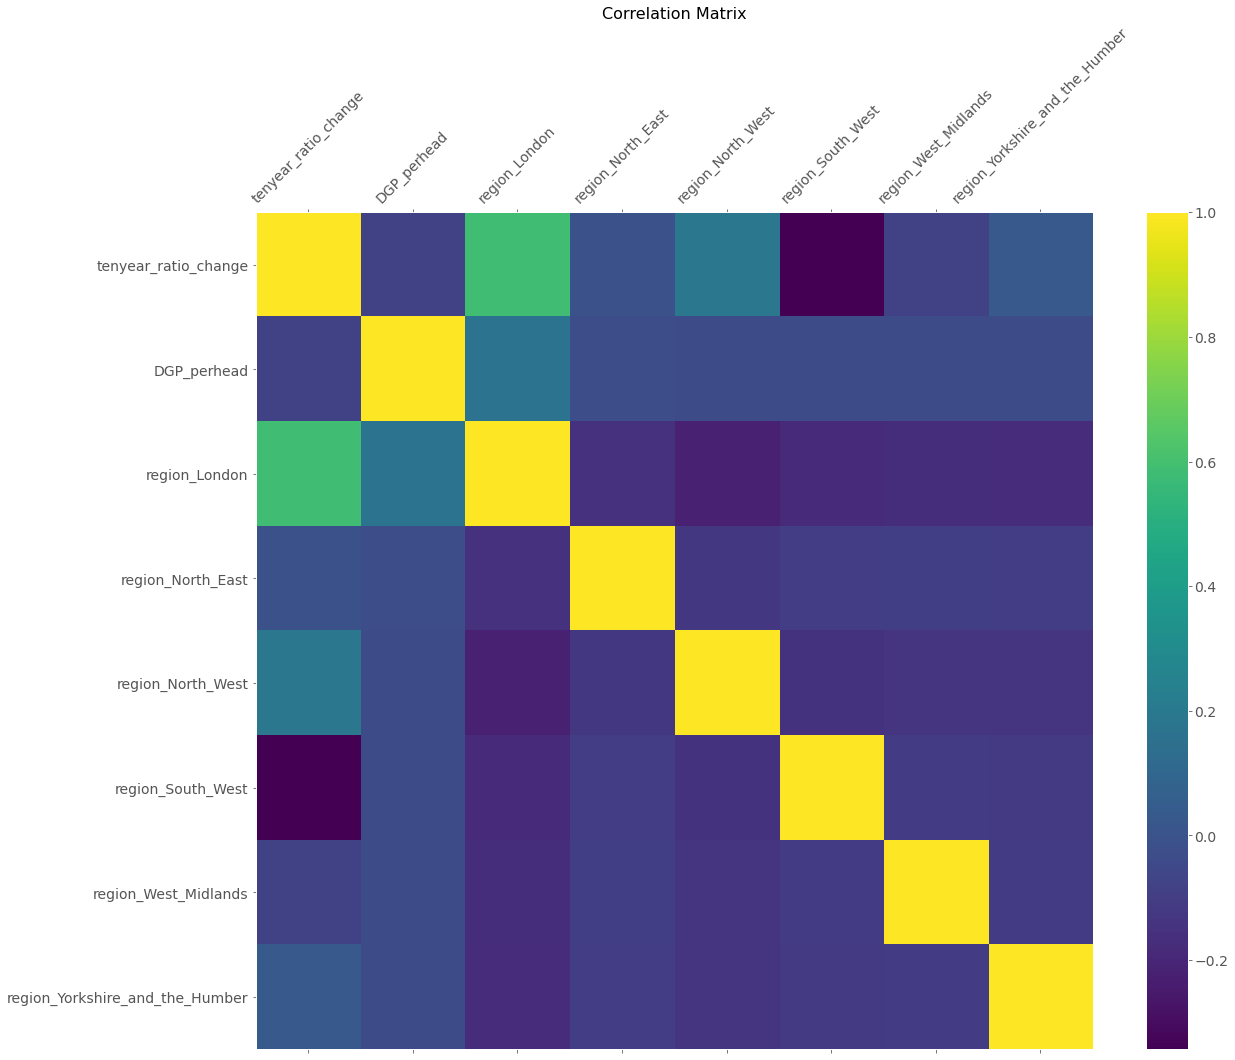

In [149]:
df = obesity_rate_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [27]:
obesity_ratiochange = obesity_rate_numeric.loc[:,['tenyear_ratio_change','DGP_perhead','region_London','region_North_East','region_North_West', 'region_South_West', 'region_West_Midlands', 'region_Yorkshire_and_the_Humber']]

In [28]:
model_GDPregion_ratiochange = sm.formula.ols('tenyear_ratio_change ~ DGP_perhead + region_London + region_North_East + region_North_West + region_South_West + region_West_Midlands + region_Yorkshire_and_the_Humber', obesity_ratiochange).fit()
model_GDPregion_ratiochange.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tenyear_ratio_change   R-squared:                       0.583
Model:                              OLS   Adj. R-squared:                  0.563
Method:                   Least Squares   F-statistic:                     28.82
Date:                  Mon, 15 Nov 2021   Prob (F-statistic):           1.54e-24
Time:                          03:57:51   Log-Likelihood:                 1110.9
No. Observations:                   152   AIC:                            -2206.
Df Residuals:                       144   BIC:                            -2182.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0002   2.67e-05      6.326      0.000       0.000       0.000
DGP_perhead                     -7.368e-11   2.16e-11     -3.416      0.001   -1.16e-10    -3.1e-11
region_London                       0.0005   3.98e-05     12.125      0.000       0.000       0.001
region_North_East                   0.0002    5.5e-05      3.185      0.002    6.64e-05       0.000
region_North_West                   0.0003   4.38e-05      6.729      0.000       0.000       0.000
region_South_West               -6.845e-05   4.94e-05     -1.385      0.168      -0.000    2.93e-05
region_West_Midlands                0.0001   5.19e-05      2.256      0.026    1.45e-05       0.000
region_Yorkshire_and_the_Humber     0.0002   5.06e-05      4.075      0.000       0.000       0.000
==============================================================================
Omnibus:                       20.372   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.583
Skew:                          -0.586   Prob(JB):                     9.34e-10
Kurtosis:                       5.279   Cond. No.                     3.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

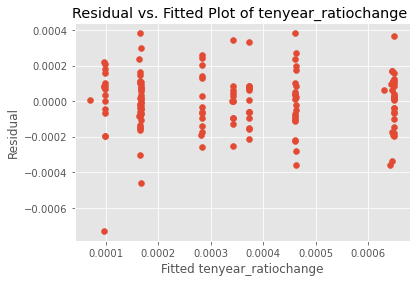

In [29]:
# Residual vs Fitted
plt.scatter(model_GDPregion_ratiochange.fittedvalues, model_GDPregion_ratiochange.resid)

plt.xlabel('Fitted tenyear_ratiochange')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of tenyear_ratiochange ')
plt.show()

In [ ]:
# ten-year obesity ratiochange was more relevant with the GDP cause the \coef\ was smallest and the P was close to 0.